In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

student_mat_df = pd.read_csv('./data/student-mat.csv')
student_por_df = pd.read_csv('./data/student-por.csv')

merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

student_merge_df = pd.merge(
    student_mat_df,
    student_por_df,
    on = merge_columns
)

# Student Alcohol Consumption
## Loading data sets
In order to make our data set even bigger I merged two files: *student-mat.csv* and *student-por.csv*
The data very obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students.
*Additional note* : there are several (382) students that belong to both datasets. We deal with these doubles by merging files with pandas.merge() 

## Traing Linear Regression model
Even tough the data set is called *Student Alcohol Consumption*, in reality, it does not focus on the alcohol consumption. Here are the column names which meaning I will explain:
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

As we can see, there are only 2 columns related to ethanol within 30 total.
So, I will start by analyzing something else.

In [62]:
#a)
X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 

#Your code:
model.fit(X, y)
#Hint: .fit()

LinearRegression(n_jobs=1)

R^2 equals: 0.49670880166311393
Mean squared error equals: 57947526161.288376
Intercept equals: -32304.654721028113
Coefficients equals: [269.46205468]


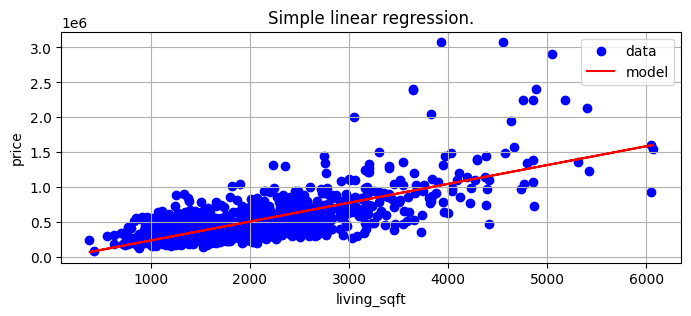

In [63]:
#b)

#Your code:
y_pred= model.predict(X)

r_squared=model.score(X,y)
mse= mean_squared_error(y, y_pred)

print(f"R^2 equals: {r_squared}")
print(f"Mean squared error equals: {mse}")
print(f"Intercept equals: {model.intercept_}")
print(f"Coefficients equals: {model.coef_}")

plt.figure(figsize=(8, 3))
plt.scatter(X, y, color='blue', label='data')
plt.plot(X, y_pred, color='red', label='model')
plt.xlabel('living_sqft')
plt.ylabel('price')
plt.title('Simple linear regression.')
plt.grid(True)
plt.legend()
plt.show()


#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

Based on the results of the linear regression model, we can make several observations about the relationship between the **living sqft** and the **price of the house**.
## 1. $ R^2 $ Score (0.4967) 
- The $ R^2 $ score, also known as the coefficient of determination, is approximately *0.497*. This metric indicates that about *49.7%* of the variance in **price** can be explained by the variance in **sqft_living**.
- A score of *0.497* is moderate and suggests that while there is some linear relationship between the size of the living area and the house price, there is likely a significant portion of the variance in price that remains unexplained by this single predictor alone. Other factors might also play a crucial role in determining house prices, such as location, condition, and number of rooms, which are not captured in this model. 
## 2. Mean Squared Error (57,947,526,161.288376)
- MSE represents the average of the squared differences between the actual values and the predicted values.
- In this context, the large MSE value suggests that the model’s predictions can deviate quite significantly from the actual prices. Given that prices are often in the range of hundreds of thousands to millions, this high error indicates that predictions may not be particularly accurate. Thus, this simple linear model may not capture enough detail to be reliably used for predicting prices on an individual basis.
## 3. Intercept (-32,304.65)
- This represents the predicted price of a house when the sqft_living is zero.
- Though a negative intercept isn’t realistic in the context of house prices, it is not uncommon in linear regression models, particularly when the range of data doesn’t include zero values. Here, it indicates that the linear model extrapolates a non-realistic negative value outside the range of the training data and reinforces the idea that this model should not be used for predictions outside the data’s range.
## 4. Coefficient (269.46)
- This indicates that, on average, for every additional square foot of living area, the price increases by about $269.46.
- This coefficient shows that there is indeed a positive relationship between the living area and price, meaning that, as expected, larger homes tend to have higher prices. However, the model implies a consistent rate of increase, which may oversimplify real-world pricing, where larger homes might see diminishing returns per square foot or other nonlinear effects.


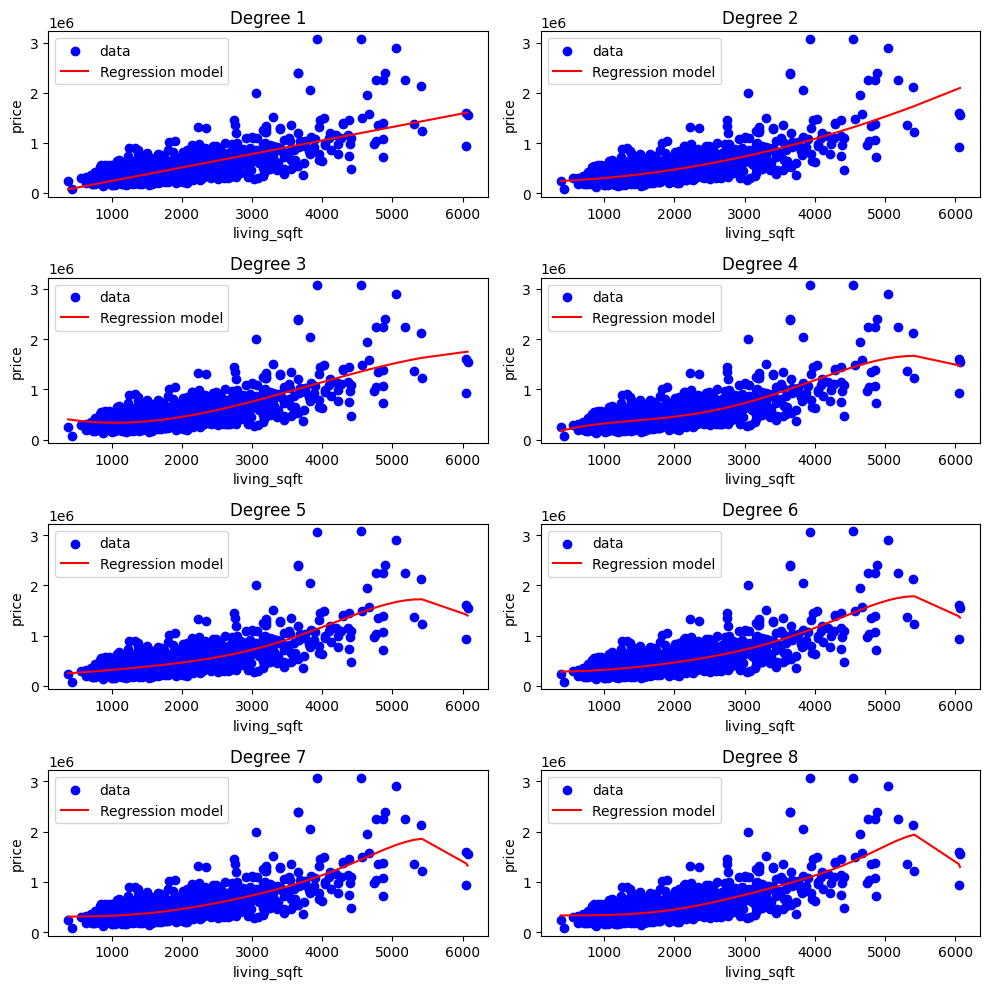

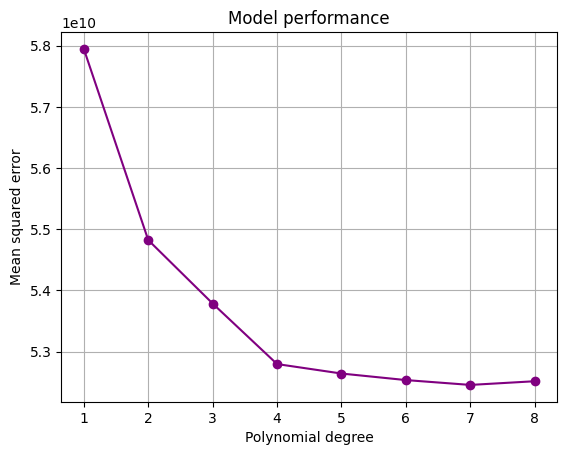

In [64]:
#c)

mse_values = []

fig, axs = plt.subplots(4, 2, figsize=(10, 10))
axs = axs.ravel() #making it one dimensional array for easier indexing

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    poly_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 
    poly_model.fit(X_order, y)
    
    y_poly_pred = poly_model.predict(X_order)
    
    mse = mean_squared_error(y_poly_pred, y)
    mse_values.append(mse)
    
    sorted_indices = np.argsort(X.flatten())
    X_sorted = X[sorted_indices]
    y_poly_pred_sorted = y_poly_pred[sorted_indices]
    
    axs[order-1].scatter(X, y, color='blue', label='data')
    axs[order-1].plot(X_sorted, y_poly_pred_sorted, color='red', label='Regression model')
    axs[order-1].set_xlabel('living_sqft')
    axs[order-1].set_ylabel('price')
    axs[order-1].set_title(f'Degree {order}')   
    axs[order-1].legend()
    
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(range(1,9), mse_values, marker='o', color='purple')
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")
plt.title("Model performance")
plt.grid(True)
plt.show()


## 1. Analysis of Polynomial Regression Models
- the plots above show the regression models for different polynomial degrees ranging from 1 to 8. As expected, higher-degree polynomials are more flexible which does not necessarily mean that they are better. 
- polynomial of the first degree is just a straight line as expected mathematically. It is possible that the model is too simple to capture the underlying relationship between the living area and the price.
- polynomial of the second degree is a quadratic curve. It seems to capture the data better than the linear model
- as we increase the degree, the model becomes more flexible and can fit the data more closely. However, this can lead to overfitting, where the model learns the noise in the training data rather than the underlying pattern. This is evident in the higher-degree polynomials, where the model starts to oscillate between data points, suggesting that it is fitting the noise rather than the true relationship.
- from the fourth and fifth degree onwards, the model starts to exhibit erratic behavior, with sharp peaks and valleys between data points. This may be a sign of overfitting.
## 2. Model performance vs Polynomial Degree
- the plot of mean squared error (MSE) against polynomial degree shows how the model's performance changes with increasing complexity.
- as the degree increases, the error is getting smaller, which is expected since the model can fit the training data more closely. 
- However, this does not necessarily mean that the model is better. The decrease in error may be due to the model fitting the noise in the training data.
- I would also say that the best choice in this case would be the fourth-degree polynomial model. It has a relatively low error and seems to capture the underlying pattern without overfitting. The fifth-degree polynomial has a slightly lower error, but the erratic behavior suggests that it may be overfitting the training data.
- We certainly get a less complicated function, with less coeficients, and a better fit to the data. 

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

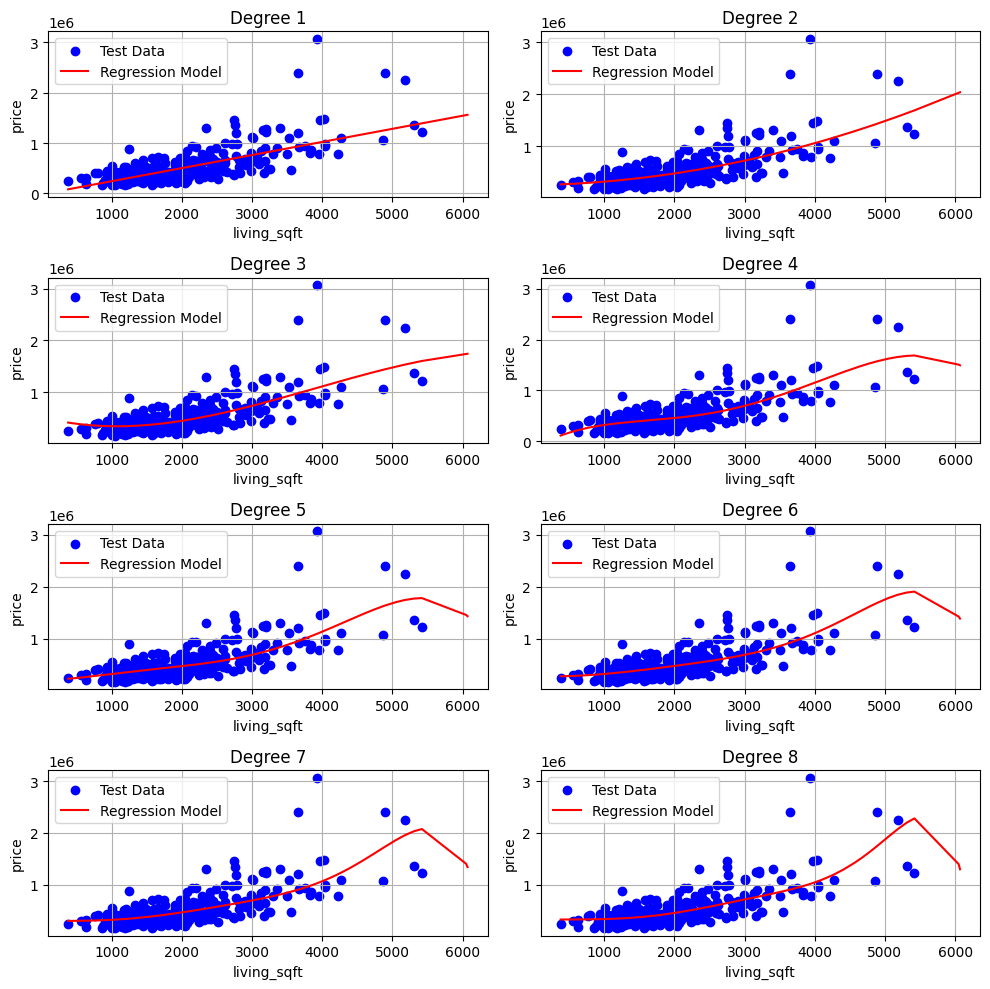

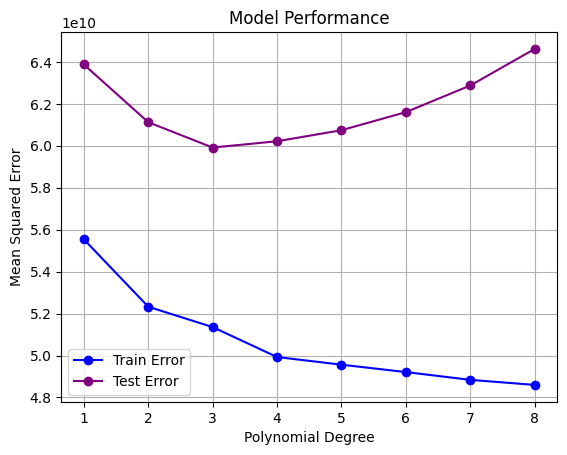

In [65]:
mse_train_values = []  
mse_test_values = []  

fig, axs = plt.subplots(4, 2, figsize=(10, 10))
axs = axs.ravel()

for order in range(1, 9):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X_train)
    
    poly_model = LinearRegression()
    poly_model.fit(X_order, y_train)  
    
    X_test_order = poly.transform(X_test) 
    y_poly_pred_test = poly_model.predict(X_test_order)  
    
    y_poly_pred_train = poly_model.predict(X_order)
    
    mse_test = mean_squared_error(y_test, y_poly_pred_test)
    mse_train = mean_squared_error(y_train, y_poly_pred_train)
    
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    
    sorted_indices = np.argsort(X.flatten())
    X_sorted = X[sorted_indices]
    y_poly_pred_sorted = poly_model.predict(poly.transform(X_sorted))
    
    axs[order - 1].scatter(X_test, y_test, color='blue', label='Test Data')
    axs[order - 1].plot(X_sorted, y_poly_pred_sorted, color='red', label='Regression Model')
    axs[order - 1].set_xlabel('living_sqft')
    axs[order - 1].set_ylabel('price')
    axs[order - 1].set_title(f'Degree {order}')   
    axs[order - 1].legend()
    axs[order - 1].grid(True)  
    
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(range(1, 9), mse_train_values, marker='o', color='blue', label='Train Error')
plt.plot(range(1, 9), mse_test_values, marker='o', color='purple', label='Test Error')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Model Performance")
plt.legend()
plt.grid(True)
plt.show()


## 1. Changes in regression models
- after splitting the data into training and test samples, the regression models show similar patterns to the previous analysis.
- however, the 'sharp peak behavior' is now more pronounced than before, especially in the higher-degree polnomials.
## 2. Model Performance
- the plot of mean squared error (MSE) against polynomial degree shows how the model's performance changes with increasing complexity.
- We can observe that now the test error starts to grow after the fourth-degree polynomial
- this is a clear sigh that with higher degree polynomials we do not get a better model, but we may be overfitting the training data
- With that knowledgle collected, I now think that the third-degree polynomial regression model is the best choice for this dataset. It has a relatively low train error, the lowest test error and seems to capture the underlying pattern without overfitting.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

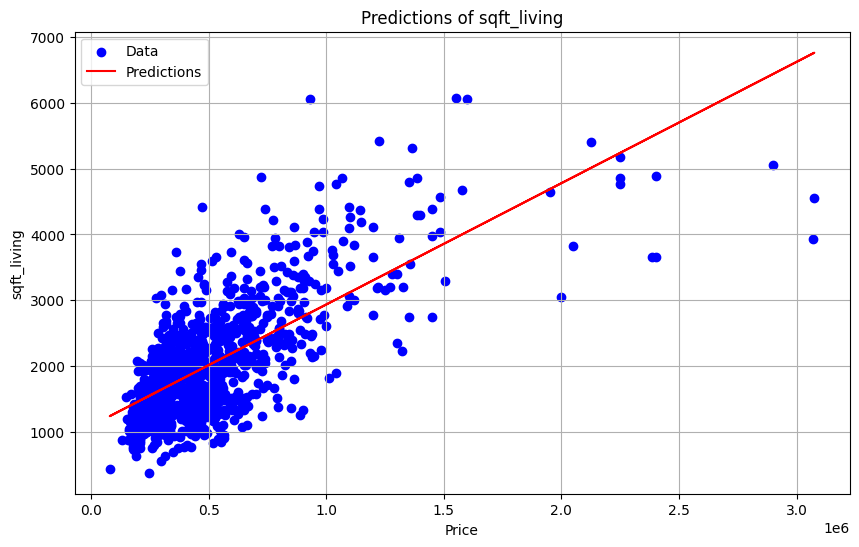

Mean squared error equals: 396407.1889615157


In [66]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Predictions')
plt.title('Predictions of sqft_living')
plt.xlabel('Price')
plt.ylabel('sqft_living')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean squared error equals: {mean_squared_error(y, y_pred)}")



After plotting the predictions of sqft_living based on house prices, we can make several observations. Our model right now suggests for instance that for a given house price being 1,000,000 we can expect the house having 3,000 sqft.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Model 1
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1, 4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias=False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
MSE_first = mean_squared_error(y_test, y_pred)
print(f"Mean squared error equals: {MSE_first}")

# Model 2
X_new = house_df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built', 'yr_renovated', 'waterfront'
]].values.reshape(-1, 7)

poly = PolynomialFeatures(3, include_bias=False)
X_new = poly.fit_transform(X_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.5, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
MSE_second = mean_squared_error(y_test, y_pred)
print(f"Mean squared error equals: {MSE_second}")
print(f"Difference between two MSE: {abs(MSE_second - MSE_first)}")

Mean squared error equals: 48749229778.7155
Mean squared error equals: 53844148247.65087
Difference between two MSE: 5094918468.935371


## Analysis of the models
- I have tried to create my model with smaller MSE than the one proposed. I have used more features and polynomial degree of 3.
- However, I have not managed to create a model with a lower MSE than the proposed one.
- As a excuse I can say that the proposed model is already quite good and it is hard to beat it ;)
- What is more, the difference between two is onlyy 5094918468.935371...
- I have also tried to use different features, but the results were worse.